## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/LaboratoryOfComputationalPhysics_Y3

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

### Exercise 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'data_000637.txt'
N = 50000
data = pd.read_csv(filename, nrows = N)

data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
49995,1,1,2,3869200664,1103,4
49996,1,1,4,3869200664,1105,14
49997,1,0,59,3869200664,1191,17
49998,1,0,32,3869200664,1191,1


### Exercise 2

In [3]:
x = data['BX_COUNTER'].max() + 1

# I added 1 because BX starts from zero

print(x)

3564


### Exercise 3

In [4]:
totorbs = data['ORBIT_CNT'][len(data) - 1] - data['ORBIT_CNT'][0] 
partialtime = totorbs*x*25

print('Total time for 50000 data = ' + str(partialtime*1e-09) + ' s')

# total length / dataset used length

totaltime = partialtime*1310720/50000

print('Estimate total time for data-taking the whole set = ' + str(totaltime*1e-09) + ' s')

Total time for 50000 data = 0.0442827 s
Estimate total time for data-taking the whole set = 1.1608444108800002 s


### Exercise 4

In [5]:
orbit_time = 25*x #time in nanoseconds of an orbit

second_time = 25/30

data['NS_TIME'] = data['ORBIT_CNT']*orbit_time + data['BX_COUNTER']*25 + data['TDC_MEAS']*second_time



###  Exercise 5

In [6]:
data['HEAD'][:] = np.random.randint(2, size = len(data))
data['HEAD']

<ipython-input-6-5fc7c252140d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HEAD'][:] = np.random.randint(2, size = len(data))


0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    0
49997    1
49998    1
49999    1
Name: HEAD, Length: 50000, dtype: int64

###  Exercise 6

In [7]:
df = data[data['HEAD'] == 1]
print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS       NS_TIME
2         1     0           63  3869200167        2553        28  3.447457e+14
4         1     0           64  3869200167        2760        25  3.447457e+14
6         1     0           61  3869200167        2772        14  3.447457e+14
7         1     0          139  3869200167        2776         0  3.447457e+14
9         1     0           60  3869200167        2788         7  3.447457e+14
...     ...   ...          ...         ...         ...       ...           ...
49989     1     0           47  3869200664        1040         5  3.447458e+14
49993     1     1            6  3869200664        1103        18  3.447458e+14
49997     1     0           59  3869200664        1191        17  3.447458e+14
49998     1     0           32  3869200664        1191         1  3.447458e+14
49999     1     0           60  3869200664        1190         6  3.447458e+14

[24954 rows x 7 columns]


### Exercise 7

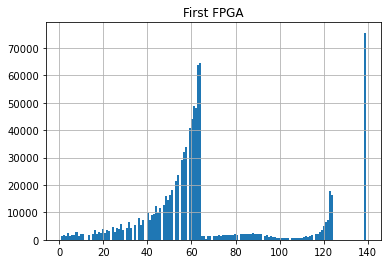

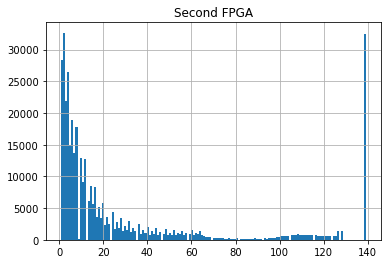

In [8]:
data = pd.read_csv(filename)

fpga_zero = data[data['FPGA'] == 0]
fpga_one = data[data['FPGA'] == 1]

plt.figure()
fpga_zero['TDC_CHANNEL'].hist(bins = 150)
plt.title('First FPGA')

plt.figure()
plt.title('Second FPGA')
fpga_one['TDC_CHANNEL'].hist(bins = 150)


### Exercise 8

In [9]:
fpga_zero_noise = fpga_zero.loc[:,['HEAD', 'TDC_CHANNEL', 'FPGA']].groupby(['TDC_CHANNEL', 'FPGA']).sum()
fpga_one_noise = fpga_one.loc[:,['HEAD', 'TDC_CHANNEL', 'FPGA']].groupby(['TDC_CHANNEL', 'FPGA']).sum()

fpga_zero_noise = fpga_zero_noise.sort_values(by = 'HEAD', ascending = False)
fpga_one_noise = fpga_one_noise.sort_values(by = 'HEAD', ascending = False)

print('Max values for FPGA ZERO')

print(fpga_zero_noise[:3])

print('Max values for FPGA ONE')

print(fpga_one_noise[:3])


Max values for FPGA ZERO
                   HEAD
TDC_CHANNEL FPGA       
139         0     75617
64          0     64581
63          0     63724
Max values for FPGA ONE
                   HEAD
TDC_CHANNEL FPGA       
2           1     32669
139         1     32442
1           1     28438


### Exercise 9

In [22]:
totorbs = data['ORBIT_CNT'][len(data) - 1] - data['ORBIT_CNT'][0] 
print('Total number of orbits = ' + str(totorbs))

data_filtered = data[data['TDC_CHANNEL'] == 139]

print('Total number of orbits counted by Channel 139: ' + str(len(data_filtered['ORBIT_CNT'].unique())))

Total number of orbits = 11004
Total number of orbits counted by Channel 139: 10976
